In [1]:
import os

# Disable file validation in the debugger
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"


First 5 rows of the dataset:


,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


Dataset contains 15789411 rows and 10 columns.

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789411 entries, 0 to 15789410
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   created_at       object 
 1   id               int64  
 2   lng              float64
 3   lat              float64
 4   topic            object 
 5   sentiment        float64
 6   stance           object 
 7   gender           object 
 8   temperature_avg  float64
 9   aggressiveness   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ GB

Summary statistics (numeric):


,id,lng,lat,sentiment,temperature_avg
count,1.578941e+07,5.307538e+06,5.307538e+06,1.578941e+07,5.307538e+06
mean,8.459853e+17,-4.639117e+01,3.408025e+01,2.536663e-03,1.245156e+00
std,3.113522e+17,7.523162e+01,2.229430e+01,4.379192e-01,3.799786e+00
min,6.132000e+03,-1.796670e+02,-9.000000e+01,-9.942049e-01,-2.328904e+01
25%,7.354169e+17,-9.536327e+01,3.315067e+01,-3.957429e-01,-1.140978e+00
50%,9.564851e+17,-7.703637e+01,3.995233e+01,-2.328273e-03,1.211522e+00
75%,1.049540e+18,-1.483154e-01,4.550884e+01,4.161248e-01,3.867153e+00
max,1.178912e+18,1.793830e+02,8.500000e+01,9.917458e-01,2.100350e+01



Summary statistics (categorical):


,created_at,topic,stance,gender,aggressiveness
count,15789411,15789411,15789411,15789411,15789411
unique,13390455,10,3,3,2
top,2016-09-25 19:35:06+00:00,Global stance,believer,male,not aggressive
freq,68,4135619,11292424,10307402,11262144



Missing values count:


created_at                0
id                        0
lng                10481873
lat                10481873
topic                     0
sentiment                 0
stance                    0
gender                    0
temperature_avg    10481873
aggressiveness            0
dtype: int64

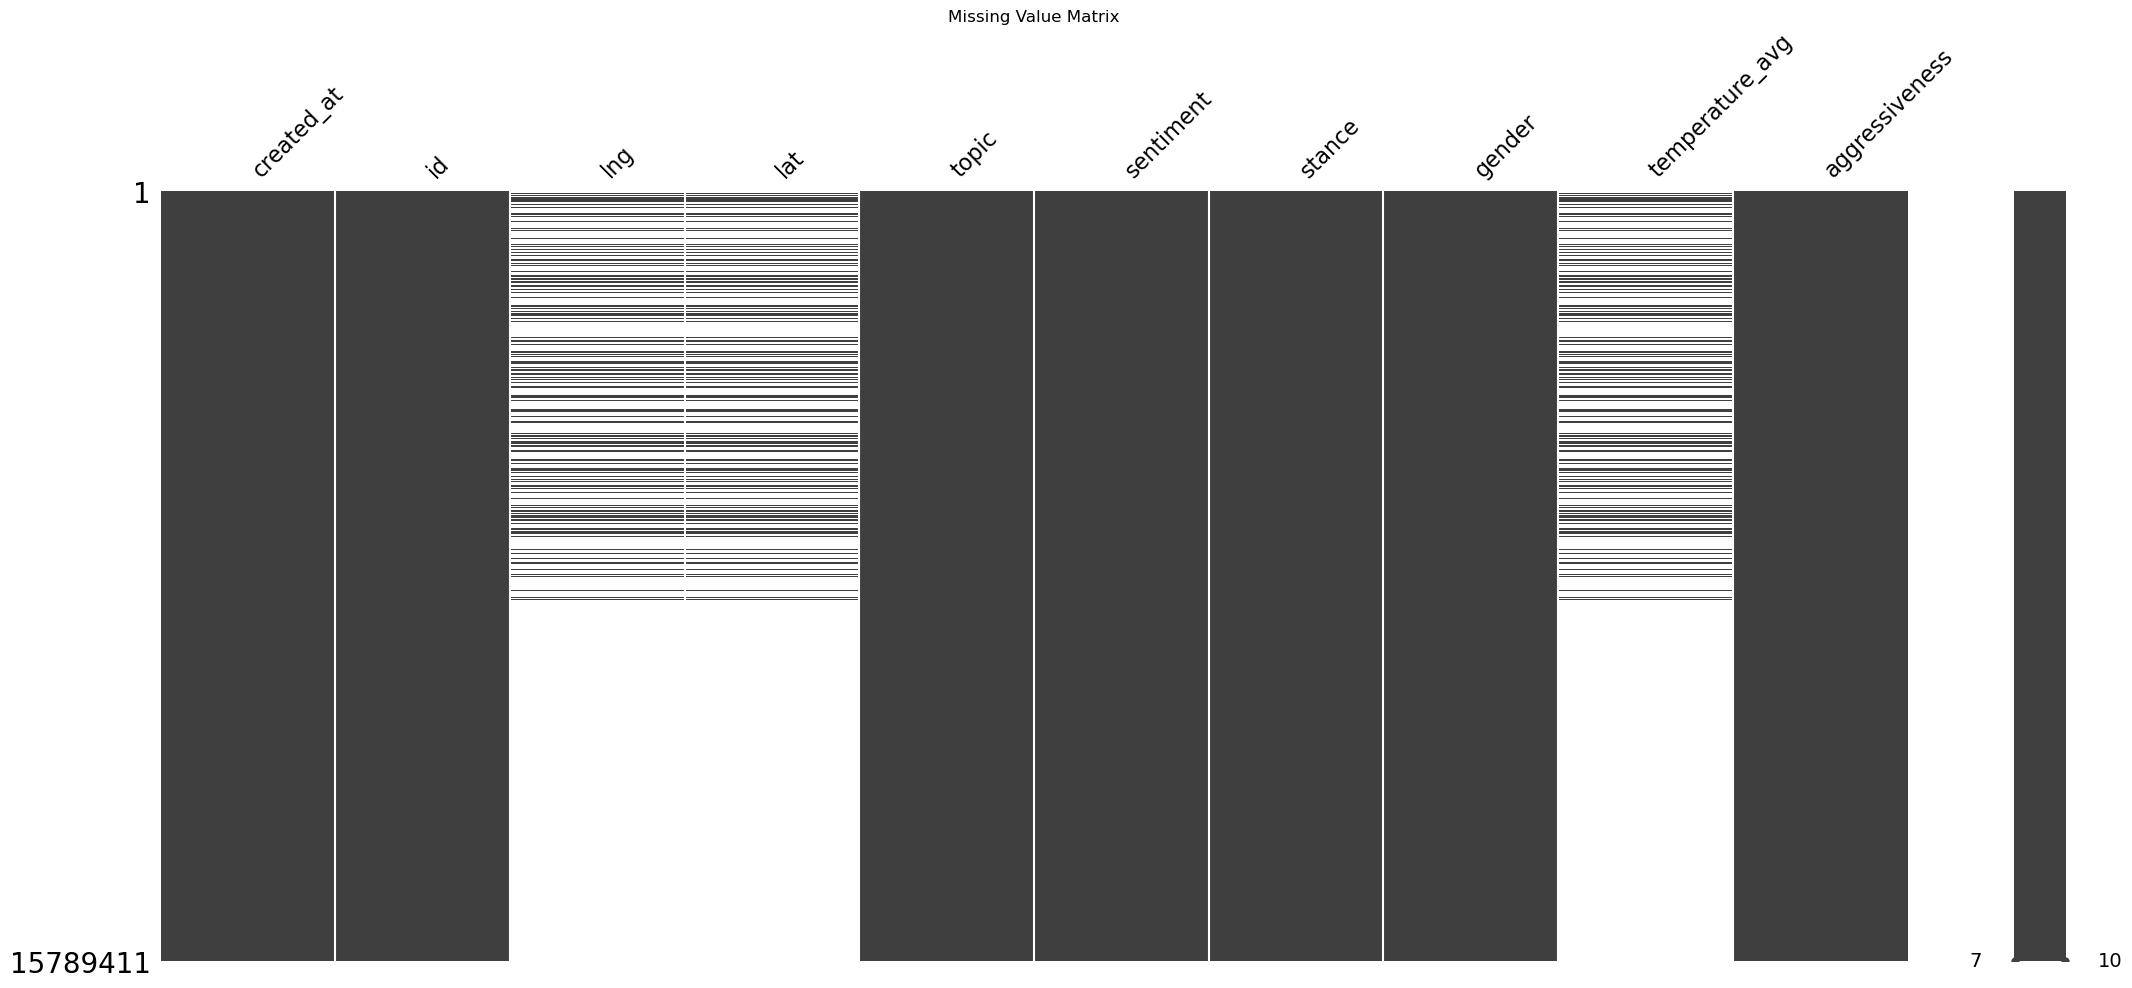

In [8]:
# section 2.1 Processing and Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset
df = pd.read_csv("The Climate Change Twitter Dataset.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and missing values
print("\nData info:")
df.info()

# Summary statistics for numeric and categorical features
print("\nSummary statistics (numeric):")
display(df.describe())

print("\nSummary statistics (categorical):")
display(df.describe(include='object'))

# Check missing values
print("\nMissing values count:")
display(df.isnull().sum())

# Visualize missing values
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()



In [9]:
# Drop rows with missing values for key predictive features
df_cleaned = df[['lng','lat','sentiment', 'temperature_avg', 'gender', 'stance', 'topic', 'aggressiveness']].dropna()
print("First 5 rows of the dataset:")
display(df_cleaned.head())



First 5 rows of the dataset:


,lng,lat,sentiment,temperature_avg,gender,stance,topic,aggressiveness
1,-73.949582,40.650104,0.575777,-1.114768,undefined,neutral,Weather Extremes,aggressive
7,-122.419420,37.774930,-0.544195,4.228540,male,neutral,Ideological Positions on Global Warming,aggressive
8,-79.791980,36.072640,-0.565028,5.478175,male,denier,Weather Extremes,aggressive
9,-121.805790,38.004920,0.650960,-1.652156,male,neutral,Weather Extremes,not aggressive
11,-1.902691,52.479699,0.670905,4.864521,male,neutral,Weather Extremes,aggressive


In [12]:
#Data Transformation- Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Initialize dictionary to hold the encoders
encoders = {}

# Iterate over the categorical columns and encode them
for col in ['gender', 'stance', 'topic', 'aggressiveness']:
    le = LabelEncoder()
    original_values = df_cleaned[col].copy()  # Save original values for display
    encoded_column_name = f"{col}_encoded"  # Name for encoded column
    
    # Create a new column for the encoded values
    df_cleaned[encoded_column_name] = le.fit_transform(df_cleaned[col])
    
    # Store the encoder for possible future inverse transformation
    encoders[col] = le

    # Display actual value and encoded value side-by-side
    print(f"\nEncoding for column: {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for label, val in mapping.items():
        print(f"  {label} -> {val}")

# Check the first few rows to confirm
#print("\nSample of DataFrame with original and encoded columns:")
#print(df_cleaned.head())
print("First 5 rows of the dataset:")
display(df_cleaned.head())



Encoding for column: gender
  female -> 0
  male -> 1
  undefined -> 2

Encoding for column: stance
  believer -> 0
  denier -> 1
  neutral -> 2

Encoding for column: topic
  Donald Trump versus Science -> 0
  Global stance -> 1
  Ideological Positions on Global Warming -> 2
  Impact of Resource Overconsumption -> 3
  Importance of Human Intervantion -> 4
  Politics -> 5
  Seriousness of Gas Emissions -> 6
  Significance of Pollution Awareness Events -> 7
  Undefined / One Word Hashtags -> 8
  Weather Extremes -> 9

Encoding for column: aggressiveness
  aggressive -> 0
  not aggressive -> 1
First 5 rows of the dataset:


,lng,lat,sentiment,temperature_avg,gender,stance,topic,aggressiveness,gender_encoded,stance_encoded,topic_encoded,aggressiveness_encoded
1,-73.949582,40.650104,0.575777,-1.114768,undefined,neutral,Weather Extremes,aggressive,2,2,9,0
7,-122.419420,37.774930,-0.544195,4.228540,male,neutral,Ideological Positions on Global Warming,aggressive,1,2,2,0
8,-79.791980,36.072640,-0.565028,5.478175,male,denier,Weather Extremes,aggressive,1,1,9,0
9,-121.805790,38.004920,0.650960,-1.652156,male,neutral,Weather Extremes,not aggressive,1,2,9,1
11,-1.902691,52.479699,0.670905,4.864521,male,neutral,Weather Extremes,aggressive,1,2,9,0


In [11]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['sentiment', 'temperature_avg']] = scaler.fit_transform(df_cleaned[['sentiment', 'temperature_avg']])


In [13]:
#Dimensionality Reduction
from sklearn.decomposition import PCA

# Selecting numeric columns for PCA
features = df_cleaned[['sentiment', 'temperature_avg']]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

df_cleaned[['PC1', 'PC2']] = principal_components


In [15]:
#Data Wrangling Operations 
# Clean category labels and lowercase
df_cleaned['gender'] = df_cleaned['gender'].astype(str).str.lower().str.strip()
df_cleaned['stance'] = df_cleaned['stance'].astype(str).str.lower().str.strip()
df_cleaned['topic'] = df_cleaned['topic'].astype(str).str.lower().str.strip()


In [17]:
# Preparation for Modeling
X = df_cleaned.drop(columns=['aggressiveness'])  # Features
y = df_cleaned['aggressiveness']                # Target


In [7]:
#Descriptive Analytics 
# Shape of the dataset
print(f"Dataset contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns.")

# Data types and missing values
print("\nData info:")
df_cleaned.info()

# Summary statistics for numeric and categorical features
print("\nSummary statistics (numeric):")
display(df_cleaned.describe())

print("\nSummary statistics (categorical):")
display(df_cleaned.describe(include='object'))

# Check missing values
print("\nMissing values count:")
display(df_cleaned.isnull().sum())

Dataset contains 5307538 rows and 8 columns.

Data info:
<class 'pandas.core.frame.DataFrame'>
Index: 5307538 entries, 1 to 15789408
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   lng              float64
 1   lat              float64
 2   sentiment        float64
 3   temperature_avg  float64
 4   gender           object 
 5   stance           object 
 6   topic            object 
 7   aggressiveness   object 
dtypes: float64(4), object(4)
memory usage: 364.4+ MB

Summary statistics (numeric):


,lng,lat,sentiment,temperature_avg
count,5.307538e+06,5.307538e+06,5.307538e+06,5.307538e+06
mean,-4.639117e+01,3.408025e+01,1.717972e-02,1.245156e+00
std,7.523162e+01,2.229430e+01,4.407791e-01,3.799786e+00
min,-1.796670e+02,-9.000000e+01,-9.929233e-01,-2.328904e+01
25%,-9.536327e+01,3.315067e+01,-3.856096e-01,-1.140978e+00
50%,-7.703637e+01,3.995233e+01,9.962937e-03,1.211522e+00
75%,-1.483154e-01,4.550884e+01,4.308393e-01,3.867153e+00
max,1.793830e+02,8.500000e+01,9.895709e-01,2.100350e+01



Summary statistics (categorical):


,gender,stance,topic,aggressiveness
count,5307538,5307538,5307538,5307538
unique,3,3,10,2
top,male,believer,Global stance,not aggressive
freq,3485846,3947378,1462525,3774449



Missing values count:


lng                0
lat                0
sentiment          0
temperature_avg    0
gender             0
stance             0
topic              0
aggressiveness     0
dtype: int64

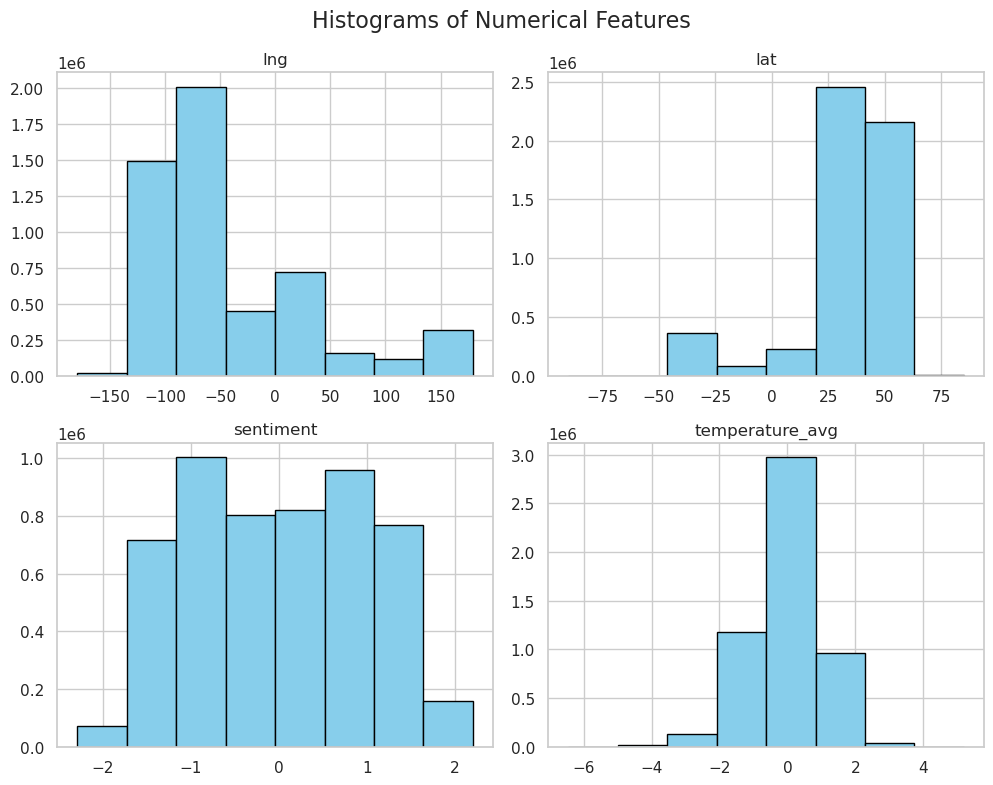

In [35]:
#Histograms (Distribution Analysis)
df_cleaned[['lng', 'lat', 'sentiment', 'temperature_avg']].hist(
    bins=8, figsize=(10, 8), color='skyblue', edgecolor='black'
)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [105]:
# positive value means right
skewness = df_cleaned['sentiment'].skew()
print(f"Sentiment skewness: {skewness:.4f}")

skewness_temp = df_cleaned['temperature_avg'].skew()
print(f"Temparature skewness: {skewness_temp:.4f}")

skewness_lng = df_cleaned['lng'].skew()
print(f"Longitude skewness: {skewness_lng:.4f}")

skewness_lat = df_cleaned['lat'].skew()
print(f"Laitude skewness: {skewness_lat:.4f}")


Sentiment skewness: 0.0244
Temparature skewness: -0.2713
Longitude skewness: 1.2814
Laitude skewness: -2.0892


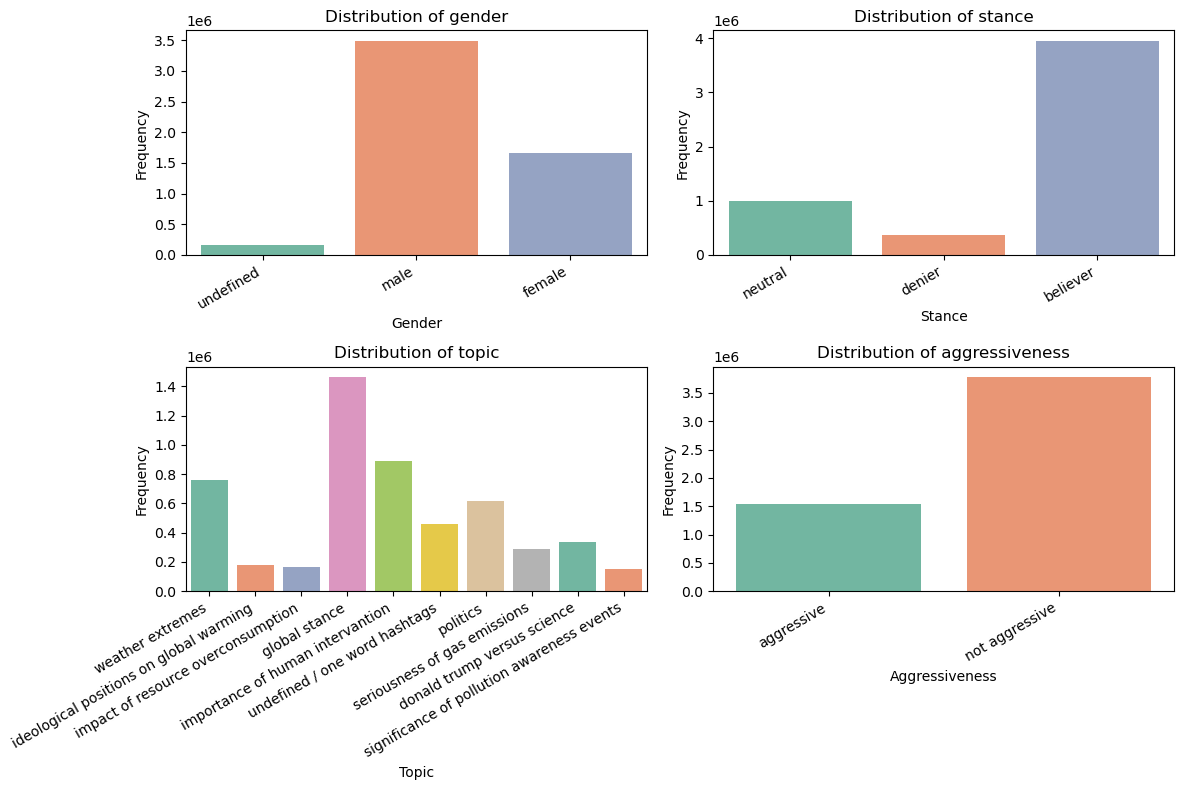

In [41]:
#bar chart Count of Categorical Variables
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['gender', 'stance', 'topic', 'aggressiveness']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(data=df_cleaned, x=col, hue=col, palette="Set2", legend=False, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col.capitalize())
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")  # <- correct and safe way
plt.tight_layout()
plt.show()




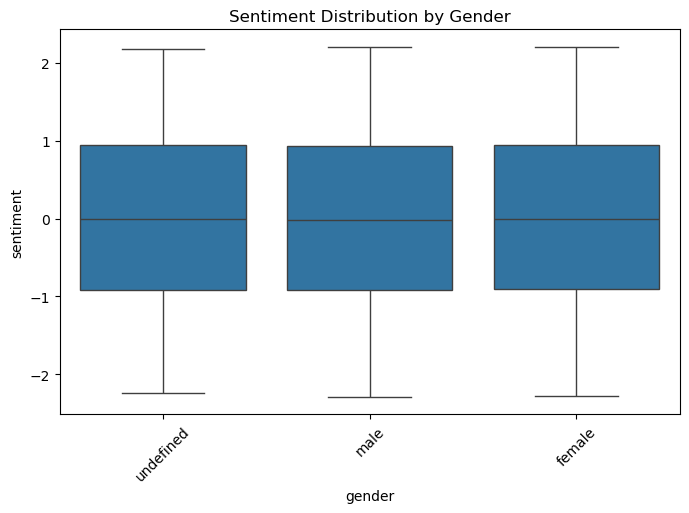

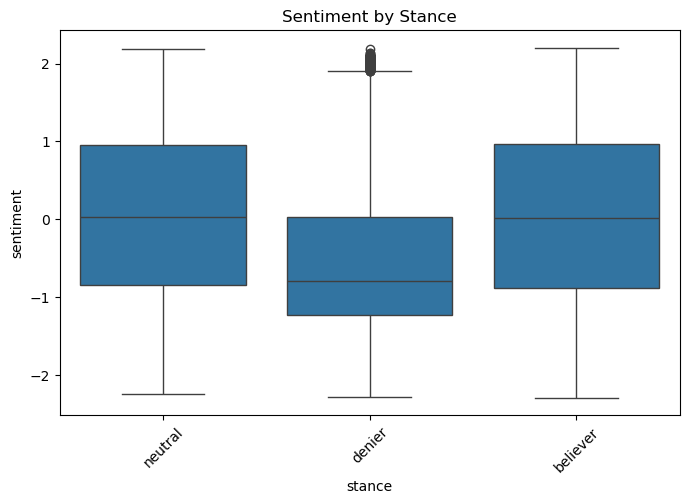

In [23]:
#Compare distributions across groups like gender and stance
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='sentiment', data=df_cleaned)
plt.title('Sentiment Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='stance', y='sentiment', data=df_cleaned)
plt.title('Sentiment by Stance')
plt.xticks(rotation=45)
plt.show()



/tmp/ipykernel_140488/2581342232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='aggressiveness', y='sentiment', palette='Set2')


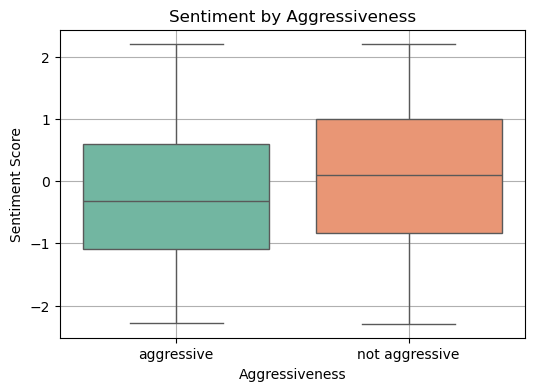

In [71]:
#Boxplot: Sentiment by Aggressiveness
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_cleaned, x='aggressiveness', y='sentiment', palette='Set2')
plt.title('Sentiment by Aggressiveness')
plt.ylabel('Sentiment Score')
plt.xlabel('Aggressiveness')
plt.grid(True)
plt.show()

/home/opc/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


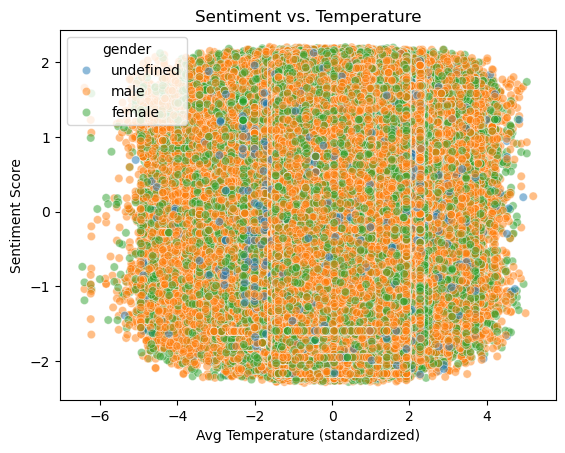

In [23]:
# Sentimenplt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='temperature_avg', y='sentiment', hue='gender', alpha=0.5)
plt.title('Sentiment vs. Temperature')
plt.xlabel('Avg Temperature (standardized)')
plt.ylabel('Sentiment Score')
plt.show()


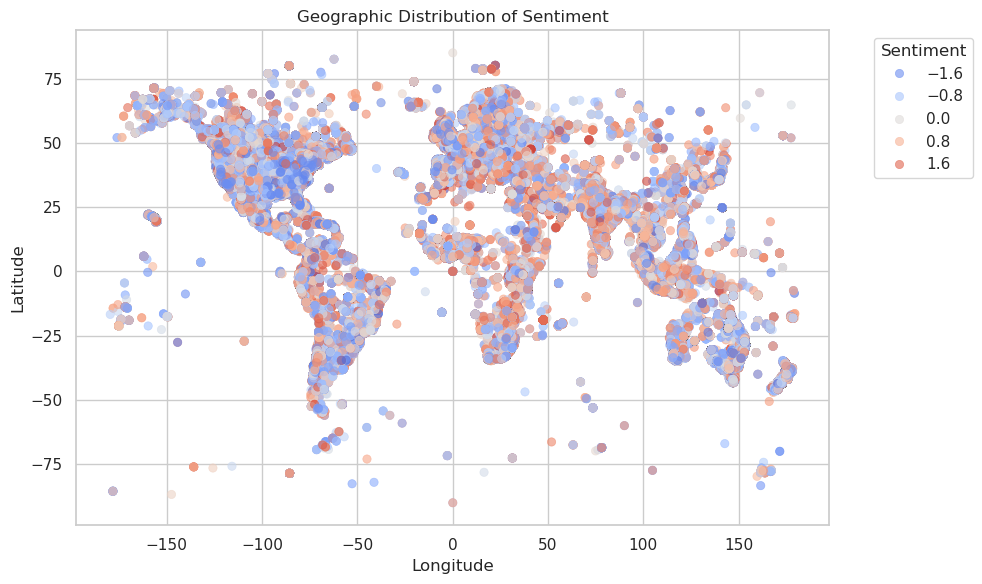

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='lng',         # Longitude on X-axis
    y='lat',         # Latitude on Y-axis
    hue='sentiment', # Color-coded by sentiment
    palette='coolwarm', # Blue to red color gradient
    alpha=0.6,
    edgecolor=None
)

plt.title('Geographic Distribution of Sentiment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
#descriptive for categorical feautures - Frequency Counts (Distribution)
categorical_cols = ['gender', 'stance', 'topic', 'aggressiveness']
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df_cleaned[col].value_counts())



gender value counts:
 gender
male         3485846
female       1659423
undefined     162269
Name: count, dtype: int64

stance value counts:
 stance
believer    3947378
neutral      994843
denier       365317
Name: count, dtype: int64

topic value counts:
 topic
global stance                                 1462525
importance of human intervantion               889463
weather extremes                               761129
politics                                       618945
undefined / one word hashtags                  458904
donald trump versus science                    333777
seriousness of gas emissions                   291323
ideological positions on global warming        176568
impact of resource overconsumption             164996
significance of pollution awareness events     149908
Name: count, dtype: int64

aggressiveness value counts:
 aggressiveness
not aggressive    3774449
aggressive        1533089
Name: count, dtype: int64


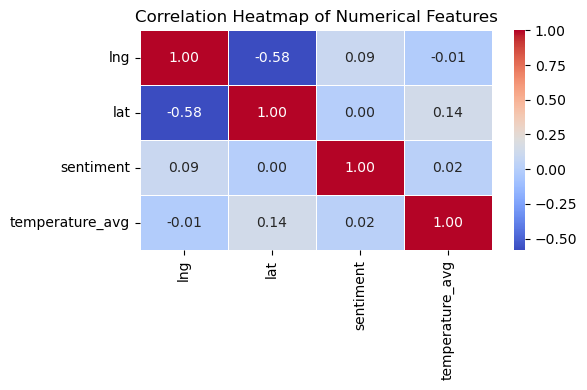

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = ['lng', 'lat', 'sentiment', 'temperature_avg']
corr_matrix = df_cleaned[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


/home/opc/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


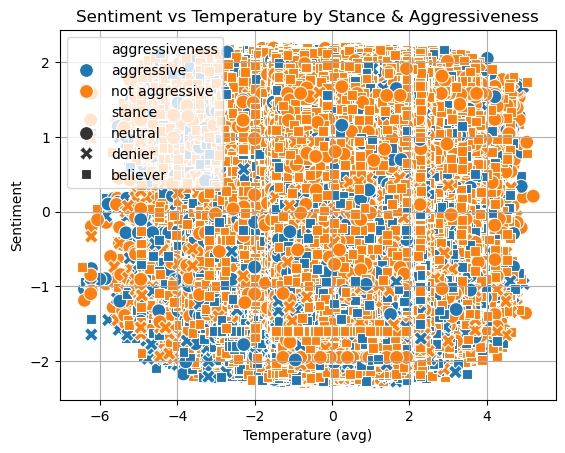

In [37]:
#Sentiment vs. Temperature (with Aggressiveness)
sns.scatterplot(
    data=df_cleaned,
    x='temperature_avg',
    y='sentiment',
    hue='aggressiveness',
    style='stance',
    s=100
)
plt.title("Sentiment vs Temperature by Stance & Aggressiveness")
plt.xlabel("Temperature (avg)")
plt.ylabel("Sentiment")
plt.grid(True)
plt.show()


In [45]:
#Cross-tabulations (e.g., stance vs aggressiveness)
pd.crosstab(df_cleaned['stance'], df_cleaned['aggressiveness'], normalize='index') * 100


aggressiveness,aggressive,not aggressive
stance,,
believer,27.497671,72.502329
denier,42.678277,57.321723
neutral,29.325331,70.674669


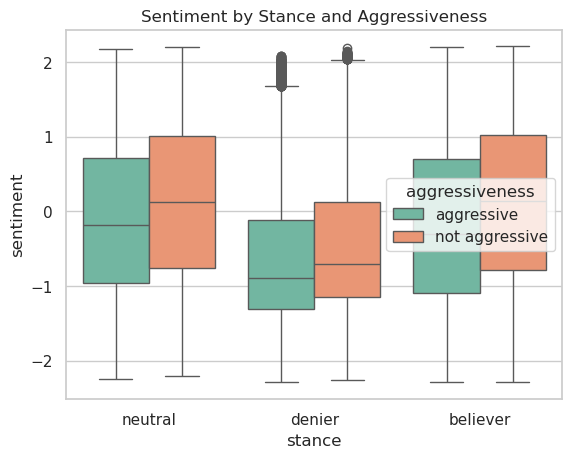

In [41]:
#Boxplots for Numerical Variables by Category
sns.boxplot(data=df_cleaned, x='stance', y='sentiment', hue='aggressiveness', palette='Set2')
plt.title("Sentiment by Stance and Aggressiveness")
plt.show()


In [47]:
#Diagnostic Analytics - Hypothesis Testing - T-Test- Does gender affect sentiment? 
#If p < 0.05, then gender has a significant impact on sentiment.
from scipy.stats import ttest_ind

# Extract sentiment scores by gender
male = df_cleaned[df_cleaned['gender'] == 'male']['sentiment'].dropna()
female = df_cleaned[df_cleaned['gender'] == 'female']['sentiment'].dropna()
print("Male count:", len(male))
print("Female count:", len(female))


# Perform t-test assuming unequal variances (Welchs t-test)
t_stat, p_val = ttest_ind(male, female, equal_var=False)

print(f"T-Test: t={t_stat:.4f}, p={p_val:.4f}")





Male count: 3485846
Female count: 1659423
T-Test: t=-11.5635, p=0.0000


In [49]:
# NOVA - Sentiment across stances
# A significant p-value suggests sentiment varies by stance
from scipy.stats import f_oneway

groups = [group['sentiment'].dropna() for name, group in df_cleaned.groupby('stance')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F={f_stat:.4f}, p={p_val:.4f}")


ANOVA: F=61007.3680, p=0.0000


In [47]:
#Diagnostic Regression - Sentiment as Dependent Variable
#R² tells how much variance is explained by predictors.
#Feature weights can suggest direction of influence (positive/negative).
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import pandas as pd

# Prepare the data
diag_df = df_cleaned[['sentiment', 'temperature_avg', 'gender_encoded', 'stance_encoded', 'topic_encoded']].dropna()

# Encode categorical features
#for col in ['gender', 'stance', 'topic']:
#    diag_df[col] = LabelEncoder().fit_transform(diag_df[col])

# Define features and target
X = diag_df.drop(columns='sentiment')
y = diag_df['sentiment']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")




R²: 0.0008
RMSE: 0.9995


/tmp/ipykernel_140488/2063653366.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=readable_features, palette="viridis")


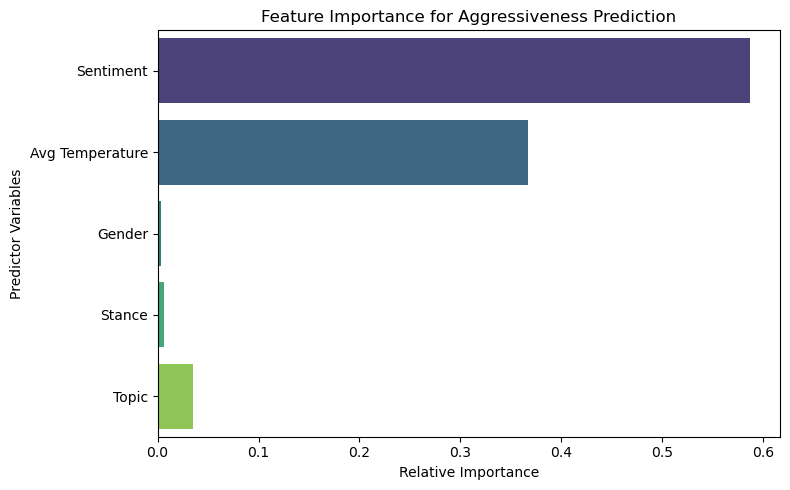

In [59]:
#Diagnostic Visualization - Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data with encoded variables and drop missing values
#diag_df = df_cleaned[[
#    'aggressiveness_encoded', 'sentiment', 'temperature_avg',
#    'gender_encoded', 'stance_encoded', 'topic_encoded'
#]].dropna()

# Define features and target
X_diag =   df_cleaned[['sentiment', 'temperature_avg',
    'gender_encoded', 'stance_encoded', 'topic_encoded'
]]# diag_df.drop(columns='aggressiveness_encoded')
y_diag = diag_df['aggressiveness_encoded']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_diag)
X_diag = pd.DataFrame(X_scaled, columns=X_diag.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_diag, y_diag, test_size=0.3, random_state=42
)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X_diag.columns

# Map feature names to more readable labels for visualization
feature_labels = {
    'sentiment': 'Sentiment',
    'temperature_avg': 'Avg Temperature',
    'gender_encoded': 'Gender',
    'stance_encoded': 'Stance',
    'topic_encoded': 'Topic'
}
readable_features = [feature_labels.get(f, f) for f in features]

# Visualize feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=readable_features, palette="viridis")
plt.title("Feature Importance for Aggressiveness Prediction")
plt.xlabel("Relative Importance")
plt.ylabel("Predictor Variables")
plt.tight_layout()
plt.show()


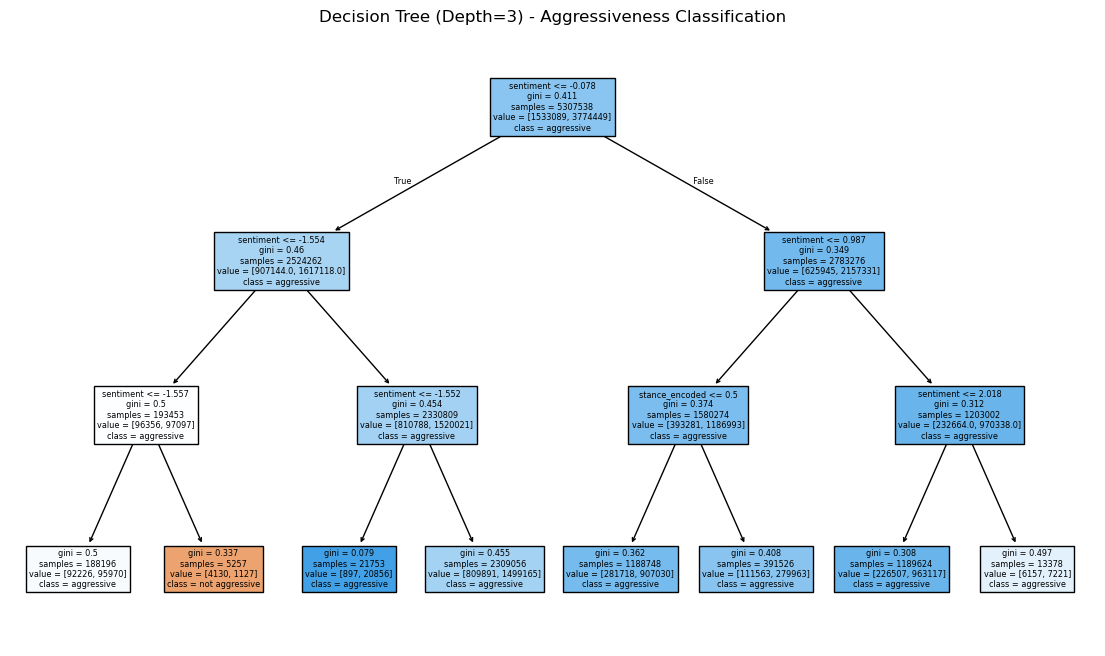

In [53]:
#Decision Tree Visualization 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Copy df to avoid modifying original
#df_tree = df_cleaned.copy()

# Encode categorical features
#le_gender = LabelEncoder()
#le_stance = LabelEncoder()

#df_tree['gender_encoded'] = le_gender.fit_transform(df_tree['gender'])
#df_tree['stance_encoded'] = le_stance.fit_transform(df_tree['stance'])
#df_tree['stance_encoded'] = le_stance.fit_transform(df_tree['stance'])

# Define features and target
X_cls = df_cleaned[['sentiment', 'temperature_avg', 'gender_encoded', 'stance_encoded']]
y_cls =  df_cleaned['aggressiveness_encoded'] #LabelEncoder().fit_transform(df_tree['aggressiveness_encoded'])  # Ensure target is also encoded if not already numeric

# Train the decision tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_cls, y_cls)

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(
    tree_model,
    feature_names=X_cls.columns,
    class_names=['not aggressive', 'aggressive'],
    filled=True
)
plt.title("Decision Tree (Depth=3) - Aggressiveness Classification")
plt.show()


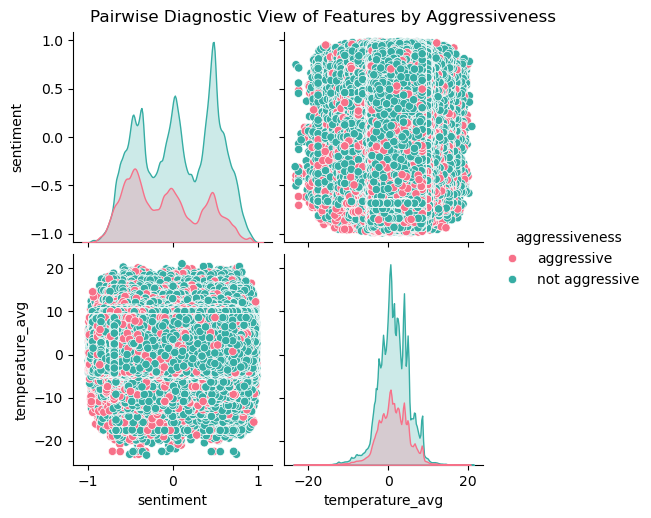

In [15]:
#Pairplot with Hue by Aggressiveness - Visualize pairwise feature relationships, colored by target class.
sns.pairplot(df_cleaned, vars=['sentiment', 'temperature_avg'], hue='aggressiveness', palette='husl')
plt.suptitle('Pairwise Diagnostic View of Features by Aggressiveness', y=1.02)
plt.show()


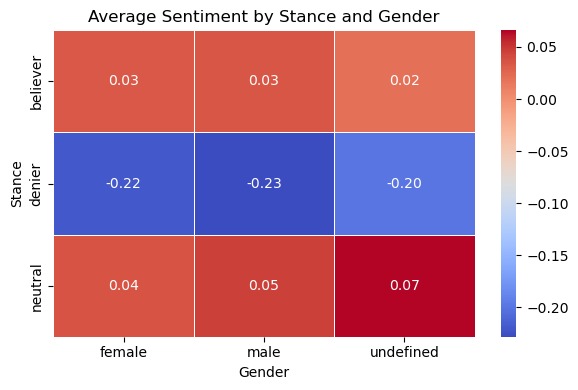

In [13]:
# Create pivot table from df_cleaned
pivot_table = df_cleaned.pivot_table(
    values='sentiment',
    index='stance',
    columns='gender',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Average Sentiment by Stance and Gender")
plt.xlabel("Gender")
plt.ylabel("Stance")
plt.tight_layout()
plt.show()


Classification Report:

                precision    recall  f1-score   support

not aggressive       0.54      0.38      0.44    459927
    aggressive       0.77      0.87      0.82   1132335

      accuracy                           0.73   1592262
     macro avg       0.66      0.62      0.63   1592262
  weighted avg       0.71      0.73      0.71   1592262



<Figure size 500x400 with 0 Axes>

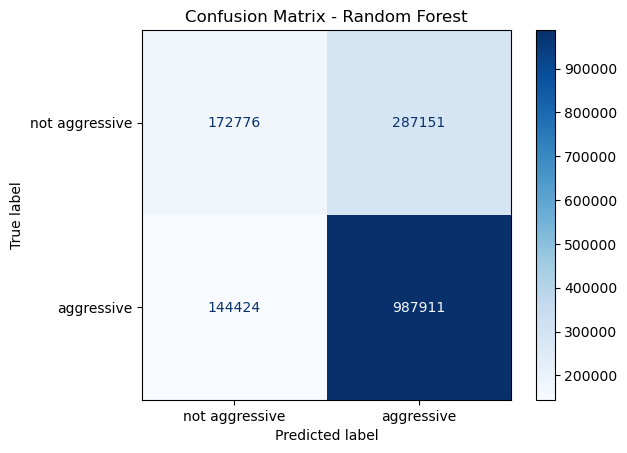

0.7159564915117655


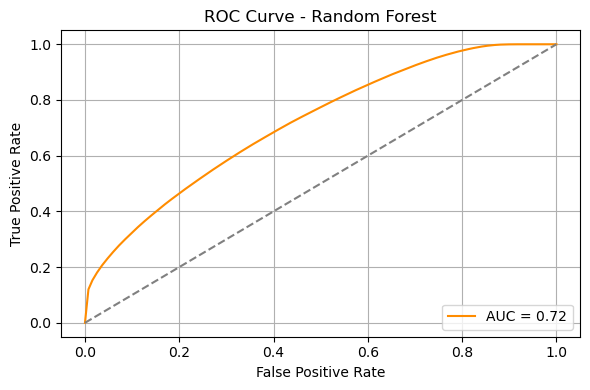

In [14]:
# Predictive Analytics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Features and Target Variable
# -------------------------------
features = ['sentiment', 'temperature_avg', 'gender_encoded', 'stance_encoded']
target = 'aggressiveness_encoded'

X = df_cleaned[features]
y = df_cleaned[target]

# -------------------------------
# 2. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# 3. Random Forest Classifier
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -------------------------------
# 4. Predictions and Probabilities
# -------------------------------
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# -------------------------------
# 5. Classification Report
# -------------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['not aggressive', 'aggressive']))

# -------------------------------
# 6. Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not aggressive', 'aggressive'])

plt.figure(figsize=(5, 4))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

# -------------------------------
# 7. ROC Curve & AUC Score
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print(roc_auc)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
